Karam Issa-
 
An algorithm that blurs out people's faces in any
given colored image without affecting the remaining parts of the image, if any face exists.

In [9]:
!pip install opencv-python
!pip install Pillow
# This will download the raw file from the opencv githup repo, to garuantee the file will always be uploaded correctly
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-07 22:04:57--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-03-07 22:04:57 (17.3 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



The haarcascade_frontalface_default.xml file is a pre-trained classifier that can detect frontal faces in images. It is a part of the OpenCV library, and it is used to detect the presence of faces in images, which is essential for face detection and blurring task.By using this pre-trained classifier, I can save time and computational resources instead of training a new face detection model from scratch.

In [ ]:
# Import the necessary libraries

# Used for opening and manipulating image files
from PIL import Image

# Used for makinf HTTP requests to web servers as the input image if from a URL
import requests

# Used for working with input and output streams.
from io import BytesIO
# Opencv Libraray fro image processing and computer vission
import cv2

# Used here to convert the image to/from a PIL Image object from/to a NumPy array.
import numpy as np

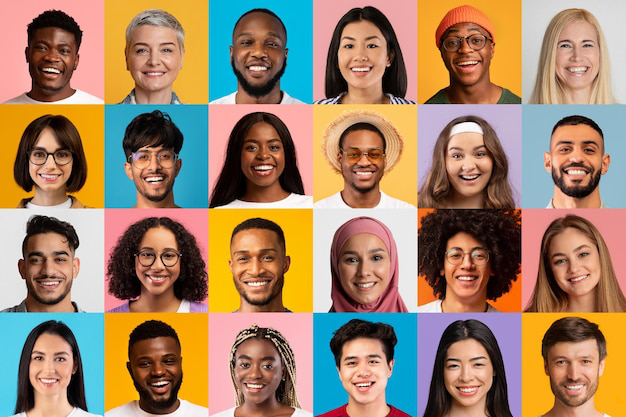

In [12]:
# Load the input image from the specified URL and store it in a PIL Image Object
url = "https://img.freepik.com/premium-photo/set-portraits-happy-people-different-ages-nationalities_116547-21899.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Display the input image
display(image)

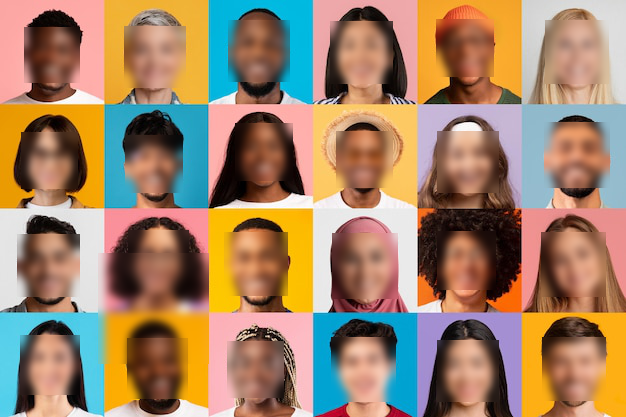

In [13]:
# Convert the image to a NumPy array that can be processed by OpenCV
image_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)



# Load the face detection classifier from the specified file path
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# To make sure that the haarcascade_frontalface_default.xml file is uploaded  to the correct location in your Google Colab notebook.
# Check that the file has been loaded correctly by checking if it is not empty
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier file')

# Convert the image to grayscale, which is required for face detection
gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using the face detection classifier
'''
scaleFactor: This parameter controls the scale factor of the image pyramid used in the face detection algorithm. The algorithm searches for faces in multiple scales of the input image, and the scaleFactor determines how much the image size is reduced at each pyramid level. A smaller scaleFactor will result in more detailed searches and slower detection times, while a larger scaleFactor will result in faster detection times but may miss smaller faces.

minNeighbors: This parameter controls how many neighboring rectangles need to be detected before a region is considered a face. The algorithm detects many potential face regions in an image, and the minNeighbors parameter filters out false positives by requiring a certain number of overlapping rectangles to be detected. A smaller minNeighbors value will result in more false positives, while a larger value will result in fewer detected faces but more accurate detections.

In general, the scaleFactor and minNeighbors parameters can be adjusted to optimize the trade-off between detection speed and accuracy for a given application.
'''
# The 'scaleFactor' and 'minNeighbors' parameters control the sensitivity and accuracy of the face detection algorithm


faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.05, minNeighbors=5)

# In the face detection step, 'cv2.CascadeClassifier.detectMultiScale()' method returns a list of detected faces as a tuple of '(x, y, w, h)' where:
# 'x' and 'y' denote the coordinates of the upper-left corner of the detected face rectangle.
# 'w' and 'h' denote the width and hefhgt of the detetcted face rectangle, respectively.

# Check if any faces were detected
if len(faces) ==0:
  # following the instruction to :BLUR IF ANY FACES EXIST, else dont blur
  print('No Faces were detected in the input image')
  
else:
# Blur the faces by iterating over each detected face and extract a region of interest(ROI) by slicing the image array using the '(x, y, w, h)' tuple.
# Then, cv2.GaussianBlur() method is applied to the ROI with a kernel size of (25, 25) to blur the face. 

  for (x, y, w, h) in faces:
      roi = image_array[y:y+h, x:x+w]
      # A relatively large kernel size of (25, 25) is used to ensure that the entire face is effectively blurred, while still preserving some level of detail.
      blurred_roi = cv2.GaussianBlur(roi, (25, 25), 0)
      # The blurred ROI is written back to the image array at the same location to replace the original face region.
      image_array[y:y+h, x:x+w] = blurred_roi

  # Convert the NumPy array back to a PIL Image object.
  pil_image = Image.fromarray(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))

  # Display the output image.
  display(pil_image)